In [49]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [50]:
us_gas_data = pd.read_csv('us_gas_data.csv')
us_gas_data

,Year,Month,Gas_Production(Mmcf),Gas_Consumption(Mmcf),Import_price($/Mcf),Export_price($/Mcf),Total Imports (Mmcf),Total Exports (Mmcf),all_grades($/Gallon),regular($/Gallon),midgrade($/Gallon),premium($/Gallon),diesel($/Gallon),Volumn(Mmcf)
0,2022,2,2856356,3040029.0,5.62,8.22,259389,545563,3.611,3.517,3.939,4.210,4.032,5997164.0
1,2022,1,3180818,3591557.0,6.87,7.04,296179,610102,3.413,3.315,3.766,4.036,3.724,6653327.0
2,2021,12,3266272,2979653.0,4.74,7.40,252626,620886,3.406,3.307,3.771,4.034,3.641,7647859.0
3,2021,11,3161306,2659971.0,5.18,8.10,242405,556982,3.491,3.395,3.836,4.098,3.727,7971480.0
4,2021,10,3219612,2237715.0,4.79,7.97,228203,545055,3.384,3.291,3.723,3.979,3.612,8103211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2001,5,1763141,1522382.0,4.95,5.50,321878,28981,1.738,1.702,1.785,1.869,1.496,5749464.0
250,2001,4,1703310,1807170.0,5.35,5.65,318573,23637,1.591,1.552,1.646,1.732,1.422,5252851.0
251,2001,3,1766754,2246633.0,5.42,4.93,358103,32121,1.450,1.409,1.506,1.596,1.399,5041971.0
252,2001,2,1582557,2309464.0,6.45,5.80,328289,26882,1.490,1.450,1.544,1.635,1.492,5240820.0


In [51]:
us_gas_data.columns

Index(['Year', 'Month', 'Gas_Production(Mmcf)', 'Gas_Consumption(Mmcf)',
       'Import_price($/Mcf)', 'Export_price($/Mcf)', 'Total Imports (Mmcf)',
       'Total Exports (Mmcf)', 'all_grades($/Gallon)', 'regular($/Gallon)',
       'midgrade($/Gallon)', 'premium($/Gallon)', 'diesel($/Gallon)',
       'Volumn(Mmcf)'],
      dtype='object')

In [52]:
us_gas_data.dtypes

Year                       int64
Month                      int64
Gas_Production(Mmcf)       int64
Gas_Consumption(Mmcf)    float64
Import_price($/Mcf)      float64
Export_price($/Mcf)      float64
Total Imports (Mmcf)       int64
Total Exports (Mmcf)       int64
all_grades($/Gallon)     float64
regular($/Gallon)        float64
midgrade($/Gallon)       float64
premium($/Gallon)        float64
diesel($/Gallon)         float64
Volumn(Mmcf)             float64
dtype: object

In [53]:
us_gas_data = us_gas_data.astype({'Gas_Production(Mmcf)':float,
              'Total Imports (Mmcf)' : float,
              'Total Exports (Mmcf)': float })
us_gas_data.dtypes

Year                       int64
Month                      int64
Gas_Production(Mmcf)     float64
Gas_Consumption(Mmcf)    float64
Import_price($/Mcf)      float64
Export_price($/Mcf)      float64
Total Imports (Mmcf)     float64
Total Exports (Mmcf)     float64
all_grades($/Gallon)     float64
regular($/Gallon)        float64
midgrade($/Gallon)       float64
premium($/Gallon)        float64
diesel($/Gallon)         float64
Volumn(Mmcf)             float64
dtype: object

In [54]:
us_gas_data.describe()

,Year,Month,Gas_Production(Mmcf),Gas_Consumption(Mmcf),Import_price($/Mcf),Export_price($/Mcf),Total Imports (Mmcf),Total Exports (Mmcf),all_grades($/Gallon),regular($/Gallon),midgrade($/Gallon),premium($/Gallon),diesel($/Gallon),Volumn(Mmcf)
count,254.000000,254.000000,2.540000e+02,2.540000e+02,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,2011.086614,6.460630,2.130387e+06,2.127122e+06,4.459764,4.955591,288559.976378,168158.531496,2.629945,2.562823,2.753433,2.909291,2.798303,6.906497e+06
std,6.121334,3.473847,5.071507e+05,4.740569e+05,2.161772,1.964109,58264.662838,146897.706073,0.718712,0.713631,0.736901,0.761305,0.844100,8.031707e+05
min,2001.000000,1.000000,1.400941e+06,1.368369e+06,1.510000,2.040000,174225.000000,23637.000000,1.127000,1.086000,1.179000,1.271000,1.152000,5.041971e+06
25%,2006.000000,3.000000,1.694616e+06,1.743070e+06,2.732500,3.510000,238368.750000,64439.500000,2.198500,2.109250,2.287750,2.430750,2.311250,6.288639e+06
50%,2011.000000,6.000000,1.994746e+06,2.068744e+06,4.035000,4.450000,282064.500000,118918.500000,2.640500,2.555000,2.786000,2.950500,2.839500,7.002317e+06
75%,2016.000000,9.000000,2.428004e+06,2.428177e+06,5.627500,6.015000,333876.250000,224495.750000,3.124000,3.062000,3.247750,3.470250,3.374000,7.545798e+06
max,2022.000000,12.000000,3.266272e+06,3.591557e+06,11.990000,12.680000,426534.000000,620886.000000,4.114000,4.062000,4.181000,4.298000,4.703000,8.384087e+06


# Annual U.S. gas Analysis

In [55]:
#group by data 'year'- all gas data
annual_gas_production = us_gas_data.groupby(['Year']).mean()['Gas_Production(Mmcf)']
annual_gas_consumption = us_gas_data.groupby(['Year']).mean()['Gas_Consumption(Mmcf)']
annual_gas_import_p = us_gas_data.groupby(['Year']).mean()['Import_price($/Mcf)']
annual_gas_export_p = us_gas_data.groupby(['Year']).mean()['Export_price($/Mcf)']
annual_total_import = us_gas_data.groupby(['Year']).mean()['Total Imports (Mmcf)']
annual_total_export = us_gas_data.groupby(['Year']).mean()['Total Exports (Mmcf)']
annual_avg_all_grades_p = us_gas_data.groupby(['Year']).mean()['all_grades($/Gallon)']
annual_avg_reg_p = us_gas_data.groupby(['Year']).mean()['regular($/Gallon)']
annual_avg_midg_p = us_gas_data.groupby(['Year']).mean()['midgrade($/Gallon)']
annual_avg_pre_p = us_gas_data.groupby(['Year']).mean()['premium($/Gallon)']
annual_avg_dis_p = us_gas_data.groupby(['Year']).mean()['diesel($/Gallon)']
annual_avg_vol = us_gas_data.groupby(['Year']).mean()['Volumn(Mmcf)']

In [56]:
# create annual summary, reorder columns
annual_gas_summary = pd.DataFrame({
    'avg_production(Mmcf)': annual_gas_production,
    'avg_consumption(Mmcf)': annual_gas_consumption,
    'avg_vol(Mmcf)': annual_avg_vol,
    'avg_total_import(Mmcf)': annual_total_import,
    'avg_toal_export(Mmcf)': annual_total_export,
    'avg_import_price($/Mmcf)': annual_gas_import_p,
    'avg_export_price($/Mmcf)': annual_gas_export_p,
    'avg_all_grades_p($/Gallon)': annual_avg_all_grades_p,
    'avg_reg_p($/Gallon)': annual_avg_reg_p,
    'avg_midg_p($/Gallon)': annual_avg_midg_p,
    'avg_pre_p($/Gallon)': annual_avg_pre_p,
    'avg_dis_p($/Gallon)': annual_avg_dis_p 
})

annual_gas_summary.head()

,avg_production(Mmcf),avg_consumption(Mmcf),avg_vol(Mmcf),avg_total_import(Mmcf),avg_toal_export(Mmcf),avg_import_price($/Mmcf),avg_export_price($/Mmcf),avg_all_grades_p($/Gallon),avg_reg_p($/Gallon),avg_midg_p($/Gallon),avg_pre_p($/Gallon),avg_dis_p($/Gallon)
Year,,,,,,,,,,,,
2001,1.714191e+06,1.853219e+06,6.335558e+06,331411.500000,31106.583333,4.357500,4.383333,1.466167,1.426000,1.518833,1.607917,1.404083
2002,1.657065e+06,1.918918e+06,6.715545e+06,334622.000000,43019.333333,3.138333,3.339167,1.381833,1.340333,1.435250,1.525833,1.315333
2003,1.664530e+06,1.856375e+06,6.256805e+06,328645.750000,56660.250000,5.180833,5.582500,1.601083,1.559167,1.656333,1.746000,1.508333
2004,1.626458e+06,1.866879e+06,6.460054e+06,354879.916667,71178.083333,5.779167,6.069167,1.891250,1.848750,1.946917,2.038417,1.807500
2005,1.577258e+06,1.834536e+06,6.492884e+06,361752.833333,60716.666667,8.085000,8.010833,2.312167,2.268167,2.367583,2.465917,2.398667


In [57]:
annual_gas_summary.to_csv('../cleaned_data/annual_gas_data.csv', index=False)

In [58]:
#annual_gas_summary['avg_production(Mmcf)'].values.reshape(-1, 1)

In [59]:
annual_gas_summary.dtypes

avg_production(Mmcf)          float64
avg_consumption(Mmcf)         float64
avg_vol(Mmcf)                 float64
avg_total_import(Mmcf)        float64
avg_toal_export(Mmcf)         float64
avg_import_price($/Mmcf)      float64
avg_export_price($/Mmcf)      float64
avg_all_grades_p($/Gallon)    float64
avg_reg_p($/Gallon)           float64
avg_midg_p($/Gallon)          float64
avg_pre_p($/Gallon)           float64
avg_dis_p($/Gallon)           float64
dtype: object

## MULT-LinearRegression model

In [60]:
#initialize X, y
X = annual_gas_summary.drop(columns = ['avg_all_grades_p($/Gallon)'])
y = annual_gas_summary['avg_all_grades_p($/Gallon)'].values.reshape(-1,1)

In [61]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [62]:
#Scale data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
X_train_s = data_scaler.fit_transform(X_train)
X_test_s = data_scaler.fit_transform(X_test)

In [63]:
#create instance of model
model = LinearRegression()

In [64]:
#train the model
model.fit(X_train_s, y_train)

LinearRegression()

In [65]:
#create prediction to test
y_pred = model.predict(X_train_s)

In [66]:
#results
print('Multi-Linear_Regression Model Result:')
print(y_pred.shape)
print('---------------------------------------')
print('intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Multi-Linear_Regression Model Result:
(16, 1)
---------------------------------------
intercept: 
 [2.72076562]
Coefficients: 
 [[ 0.01633669  0.00309147  0.003308   -0.00109622 -0.00932556  0.00379874
   0.00178933  0.84784257 -0.55641967  0.43814266 -0.00601674]]


In [72]:
#df = pd.DataFrame({'coef':model.coef_, 'category': X})

## Use STATS model

In [26]:
import statsmodels.api as sm

In [27]:
#initialize X, y
X = annual_gas_summary.drop(columns = ['avg_all_grades_p($/Gallon)'])
y = annual_gas_summary['avg_all_grades_p($/Gallon)'].values.reshape(-1,1)

In [28]:
X = sm.add_constant(X)

C:\Users\Phoeb\anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
sm_model = sm.OLS(y, X).fit()

In [30]:
predictions = sm_model.predict(X)

In [31]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.773e+05
Date:                Thu, 19 May 2022   Prob (F-statistic):           6.40e-25
Time:                        01:18:43   Log-Likelihood:                 111.34
No. Observations:                  22   AIC:                            -198.7
Df Residuals:                      10   BIC:                            -185.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Interpreting the regression result:
#### Adjusted.R-square reflects the fit of the model. R-squared values range from 0 to 1. R-squared result is : 1.0 which indicates this model is perfectly fit. In order words, 100% of the variability of our dependnt variables is explained using this Linear Model.
#### Const coefficient is y-intercept. When other features' coef. are zero, the expected output is negative 0.1233
#### Significant level =0.05, the p-value of variables: avg_vol(Mmcf),avg_reg_p,avg_midg_p,avg_pre_p is less than 0.05 which considered to be statistically significant.

In [36]:
## base on the results, we could make a prediction. 

### Use SNS to Visualize the results.

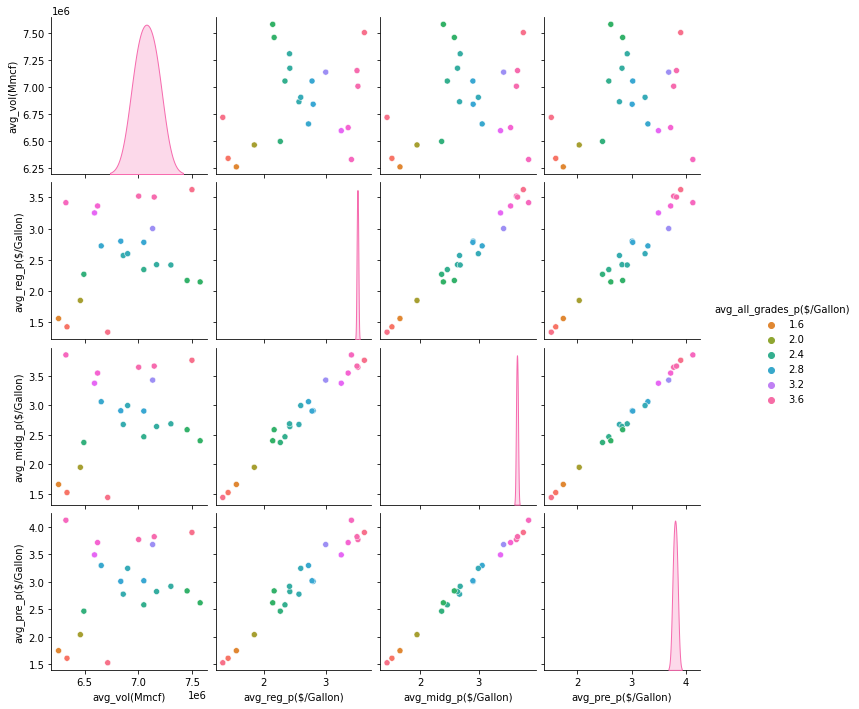

In [39]:
import seaborn as sns
#define DATA
data = annual_gas_summary[['avg_vol(Mmcf)','avg_all_grades_p($/Gallon)', 'avg_reg_p($/Gallon)','avg_midg_p($/Gallon)','avg_pre_p($/Gallon)']]
sns.pairplot(data, hue = 'avg_all_grades_p($/Gallon)',palette='husl')

In [ ]:
# useful interpretation
## https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166